In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

Read the data

In [142]:
coin_vals = np.array([5, 10, 20, 50, 100, 200, 500])

X = []
y = []

for val in coin_vals:
    path = os.path.join('data', str(val))
    for file in os.listdir(path):
        if file.endswith(".png"):
            imgdata = plt.imread(os.path.join(path, file))[0:100, 0:100, 0]
            X.append(imgdata)
            y.append(coin_vals == val)

Xtrain = np.reshape(np.array(X), [-1, 100, 100, 1])
ytrain = np.array(y, dtype=np.float32)


Create our model

In [143]:
sess = tf.Session()

x = tf.placeholder(tf.float32, [None, 100, 100, 1])
y_ = tf.placeholder(tf.float32, [None, 7])

W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 8], stddev=0.3))
b1 = tf.Variable(tf.constant(0.3 * np.ones([50, 50, 8]), dtype=tf.float32))

W2 = tf.Variable(tf.truncated_normal([3, 3, 8, 16], stddev=0.3))
b2 = tf.Variable(tf.constant(0.3 * np.ones([25, 25, 16]), dtype=tf.float32))

W3 = tf.Variable(tf.truncated_normal([400, 7], stddev=0.3))
b3 = tf.Variable(tf.constant(0.3 * np.ones([7]), dtype=tf.float32))

def pipeline(x):
    h1 = x
    h1 = tf.nn.max_pool(h1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    h1 = tf.nn.conv2d(h1, W1, [1, 1, 1, 1], 'SAME') + b1
    h1 = tf.nn.relu(h1)

    h2 = tf.nn.max_pool(h1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    h2 = tf.nn.conv2d(h2, W2, [1, 1, 1, 1], 'SAME') + b2
    h2 = tf.nn.relu(h2)

    out = tf.nn.max_pool(h2, [1, 5, 5, 1], [1, 5, 5, 1], 'VALID')
    out = tf.reshape(out, [-1, 5*5*16])
    out = tf.matmul(out, W3) + b3

    return out

y = pipeline(x)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_task = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

In [145]:
batch_size = 200

sess.run(tf.global_variables_initializer())

data_len = len(X)
perm = np.random.permutation(range(data_len))

train_set = perm[0:(data_len * 8 // 10)]
test_set = perm[(data_len * 8 // 10):(data_len * 9 // 10)]
val_set = perm[(data_len * 9 // 10):]

for epoch in range(1000):
    batch = np.random.permutation(train_set)[:batch_size]
    X_in = Xtrain[batch]
    y_in = ytrain[batch]
    sess.run(train_task, {x: X_in, y_: y_in})
    if epoch % 50 == 0:
        test_X = Xtrain[test_set]
        test_y = ytrain[test_set]
        print("Test set accuracy", np.mean(np.argmax(sess.run(y, {x: test_X}), 1) == np.argmax(test_y, 1)))
        
val_X = Xtrain[test_set]
val_y = ytrain[test_set]

print("Validation set accuracy", np.mean(np.argmax(sess.run(y, {x: val_X}), 1) == np.argmax(val_y, 1)))

Test set accuracy 0.0789473684211
Test set accuracy 0.815789473684
Test set accuracy 0.934210526316
Test set accuracy 0.947368421053
Test set accuracy 0.947368421053
Test set accuracy 0.960526315789
Test set accuracy 0.960526315789
Test set accuracy 0.973684210526
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Test set accuracy 1.0
Validation set accuracy 1.0


array([[ 1.67509365,  2.37770844,  1.16335905, -0.31232423,  2.82371259,
         7.63689089,  4.37411404]], dtype=float32)

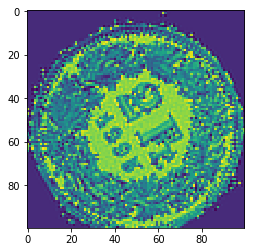

In [155]:
%matplotlib inline
plt.imshow(np.reshape(val_X[1], [100, 100]))

sess.run(y, {x: [val_X[1]]})